# MA124 Maths by Computer: Assignment 3 
## Part A: Monte Carlo Integration

Student number: 2161367

Student name: Timothy Tze Kien Yap


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

We consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. Since $\sin(x)/x$ does not have an elementary antiderivative we must use numerical methods to evaluate this integral.

### Approach 1
#### Use Monte Carlo to estimate $\bar f$, the mean value of $f$ over the interval $[a,b]$.

In the figure below, we used N = 1000 points for the Monte Carlo integration as $\sin(x)/x$ does not have an elementary antiderivative so we must use numerical methods to evaluate this integral.. The blue dots represent all 1000 points; with the graph of f(x) under it in black. The red box shows us the $\bar f$ over the interval $[a,b]$. The first printed statement shows us the numerical estimate when N = 1000. The second statement is more consistently closer to the real value of 0.3597758... as the second statement uses 10^6 points instead; hence we don't graph this as this will take too much computational resources to plot the graph. Both methods show how we can use Monte Carlo integrals to approximate an answer to the function.

the Monte Carlo estimate for f(x) = -sin(x)/x is 0.3651942337936154  using 1000 points for the estimate


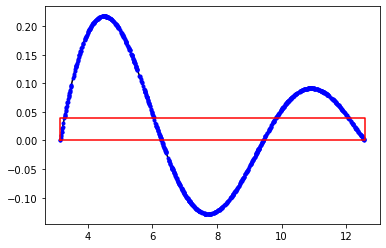

the Monte Carlo estimate for f(x) = -sin(x)/x is 0.3604578727232223  using 10**6 points for the estimate


In [11]:
# define the function to integrate
def my_sin(x):
    return (-np.sin(x)/x)

# set the interval [a,b] and the number of samples
a, b = np.pi, 4*np.pi
N = 1000

# generate the samples and evaluate f at each 
x = np.random.uniform(a, b, N)
f_x = my_sin(x)

# compute the mean and estimate the integral
f_mean = np.mean(f_x)
my_int = (b-a) * f_mean
print("the Monte Carlo estimate for f(x) = -sin(x)/x is", my_int," using 1000 points for the estimate")

# plot the function and sample points if N is small
if N <= 1000:
    x_plot = np.linspace(a, b, 101)
    y_plot = my_sin(x_plot)
    plt.plot(x_plot ,y_plot, 'k')
    plt.plot(x, f_x, 'b.')
    plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0], 'r')
    plt.show()
    
# generates the estimate for N = 10**6
N1 = 10**6
x1 = np.random.uniform(a, b, N1)
f_x1 = my_sin(x1)
f_mean1 = np.mean(f_x1)
my_int1 = (b-a) * f_mean1
print("the Monte Carlo estimate for f(x) = -sin(x)/x is", my_int1," using 10**6 points for the estimate")

### Approach 2
#### 2. Use the fact that 
$$
\int_a^b f(x) \, dx = \text{signed area under the curve}
$$

where "signed under the curve" means the area between the curve $y = f(x)$ and the x axis, taking care of positive and negative contributions to the integral. See [here](https://en.wikipedia.org/wiki/Integral). I will use Monte Carlo to estimate the integral by estimating areas as shown in the figures below.

- Approach 2 requires Monte Carlo samples in a rectangular region $[a,b] \times [y_{min}, y_{max}]$, where $y_{min}$ and $y_{max}$ should be such as to contain the graph $y = f(x)$, but not too much larger. The graph partitions the rectangle into three types of regions - those that contribute positively to the integral, those that contributed negatively to the integral, and those that do not contribute. From the areas, estimate the integral and report the value. For a sample size of $N=2000$ produce a plot showing the Monte Carlo points coloured according to the type of region they are in. There should be three colours. Include on the plot the graph $y = f(x)$ and a line on the x axis. 

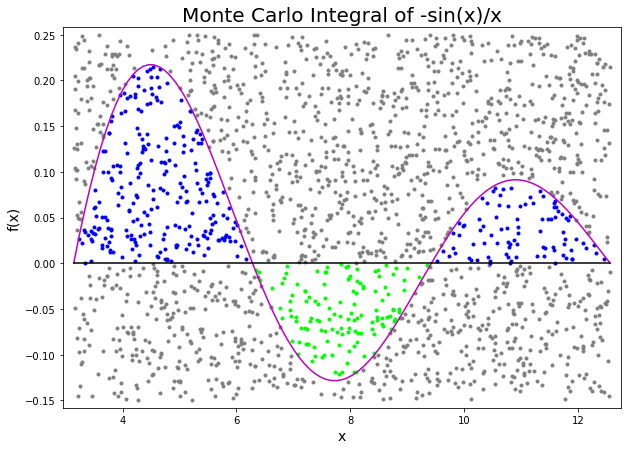

The area of the region is 0.38641589639154456 



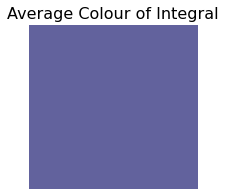

The RGB value of the graph above is ( 0.38425 , 0.38425 , 0.61575 ).


In [12]:
# Compute the area of the function by using the Monte Carlo method
# define the function to integrate
def my_sin(x):
    return (-np.sin(x)/x)

# generate N uniform random points in [x_min, x_max]x[y_min, y_max]
N = 2000
x_min, x_max = np.pi, 4*np.pi
y_min, y_max = -0.15, 0.25

x = np.random.uniform(x_min, x_max, N)
y = np.random.uniform(y_min, y_max, N)

# graph settings
plt.figure(figsize=(10,7))
plt.title("Monte Carlo Integral of -sin(x)/x", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)

# plot points within different regions of different colours region as well as tally up the average colour
total = 0
R = 0
G = 0
B = 0
for i in range(N):
    if 0< y[i] < my_sin(x[i]):
        plt.plot(x[i], y[i], '.',color = (0,0,1))
        B += 1
        total += 1
    elif my_sin(x[i]) < y[i] < 0:
        plt.plot(x[i], y[i], '.',color = (0,1,0))
        B += 1
        total -= 1
    else:
        plt.plot(x[i], y[i], '.',color = (0.5,0.5,.5))
        R += 0.5
        G += 0.5
        B += 0.5
            
# obtain the area
rectangle_area = (x_max-x_min)*(y_max-y_min)
region_area = rectangle_area * total/N

# obtaining average colour of integral
R_mean = R/N
G_mean = G/N
B_mean = B/N

# plot function in black, 'k'
t = np.linspace(x_min, x_max, 101)
t0 = t*0
plt.plot(t,my_sin(t), 'm')
plt.plot(t, t0, 'k')
plt.xlim(x_min-(x_max-x_min)/50,x_max+(x_max-x_min)/50)
plt.ylim(y_min-(y_max-y_min)/50,y_max+(y_max-y_min)/50)
plt.show()

print("The area of the region is", region_area,"\n")

# generate avervage colour of integral
plt.figure(figsize=(3,3))
plt.plot(0.5, 0.5, 's', markersize=300, color = (R_mean,G_mean,B_mean))
plt.axis('off')
plt.title("Average Colour of Integral", fontsize = 16)
plt.show()

print("The RGB value of the graph above is (", R_mean, ",", G_mean, ",", B_mean,").") 

The figures above show approach 2 to the Monte Carlo integral along with the average colour of the points and the Monte Carlo approximation of the area under the signed area of the graph. I plotted points above y = 0 but below our function to be blue with an RGB value of (0,0,1). Points below y = 0 but above the function are coloured green with an RBG value of (0,1,0). Lastly, the points that are beyond the curve from the x-axis are given a grey, an RGB value of (0.5, 0.5, 0.5). This is clearly shown in the graph "Monte Carlo Integral of -sin(x)/x" with the purple graph of $-\sin(x)/x$. Below that is the printed statement of the Monte Carlo approximation of the area. This is calculated by taking all the points in the blue region minus the green region over the total number of points. 

The coloured square is the average colour of the integral; calculated by taking the average RGB values of all the points over the total number of points. We get results around 0.38 to 0.4 for red and green and 0.6 to 0.62 for blue but of course they values depend on points that are randomly plotted so they are very general estimates. Exact results for each Monte Carlo simulations are given with the printed statement.